Compare stratification and mixing under different vertical resolution.

Susan's Triple tanh vs original

In [1]:
import netCDF4 as nc
from salishsea_tools import nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os

from salishsea_tools.nowcast import analyze
from salishsea_tools import tidetools

%matplotlib inline

In [3]:
results = '/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/'

run1 = 'vertical_res/trpl_tanh'
run2 = 'base_aug'

path={}
path[run1]= os.path.join(results,run1)
path[run2] = os.path.join(results,run2)

print(path[run1])
print(path[run2])

/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/vertical_res/trpl_tanh
/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/base_aug


In [4]:
Us = {}; Ws = {}; Ts = {}; Ss={}; Diffs={}; Viscs={}; sshs={}; depths={}; xx={}; zz={}; depthsw={}; zzw={}

runs = [run1, run2]
y=5
for run in runs:
    f = nc.Dataset(os.path.join(path[run],'SalishSea_1d_20030819_20030927_grid_U.nc'))
    Us[run] = f.variables['vozocrtx'][:,:,y,:]
    f = nc.Dataset(os.path.join(path[run],'SalishSea_1d_20030819_20030927_grid_W.nc'))
    Ws[run] = f.variables['vovecrtz'][:,:,y,:]
    Viscs[run] = f.variables['vert_eddy_visc'][:,:,y,:]
    Diffs[run] = f.variables['vert_eddy_diff'][:,:,y,:]
    depthsw[run] = f.variables['depthw'][:]
    f = nc.Dataset(os.path.join(path[run],'SalishSea_1d_20030819_20030927_grid_T.nc'))
    Ts[run] = f.variables['votemper'][:,:,y,:]
    Ss[run] = f.variables['vosaline'][:,:,y,:]
    sshs[run] = f.variables['sossheig'][:,y,:]
    depths[run] = f.variables['deptht'][:]
    x = f.variables['nav_lon'][y,:]
    times=np.arange(sshs[run].shape[0])
    xx[run],zz[run] = np.meshgrid(x,-depths[run][:])
    _, zzw[run] = np.meshgrid(x,-depthsw[run][:])  

Compare vertical grid spacing

(50, 0)

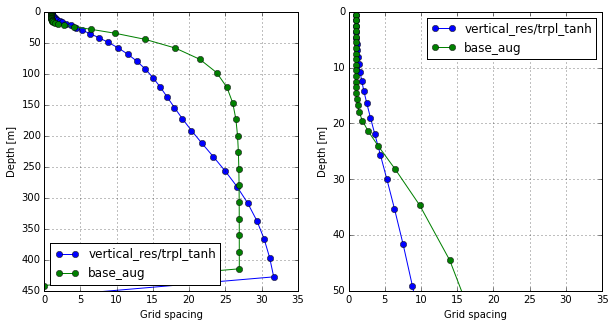

In [5]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

for run in runs:
    spacing=np.zeros(depths[run].shape)
    spacing[0:-1] = depths[run][1:]- depths[run][0:-1] 
    axs[0].plot(spacing, depths[run], 'o-', label=run)
    axs[1].plot(spacing, depths[run], 'o-', label=run)
for ax in axs:
    ax.legend(loc=0)
    ax.set_ylabel('Depth [m]')
    ax.set_xlabel('Grid spacing')
    ax.grid()
axs[0].set_ylim([450,0])
axs[1].set_ylim([50,0])

Compare fields

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


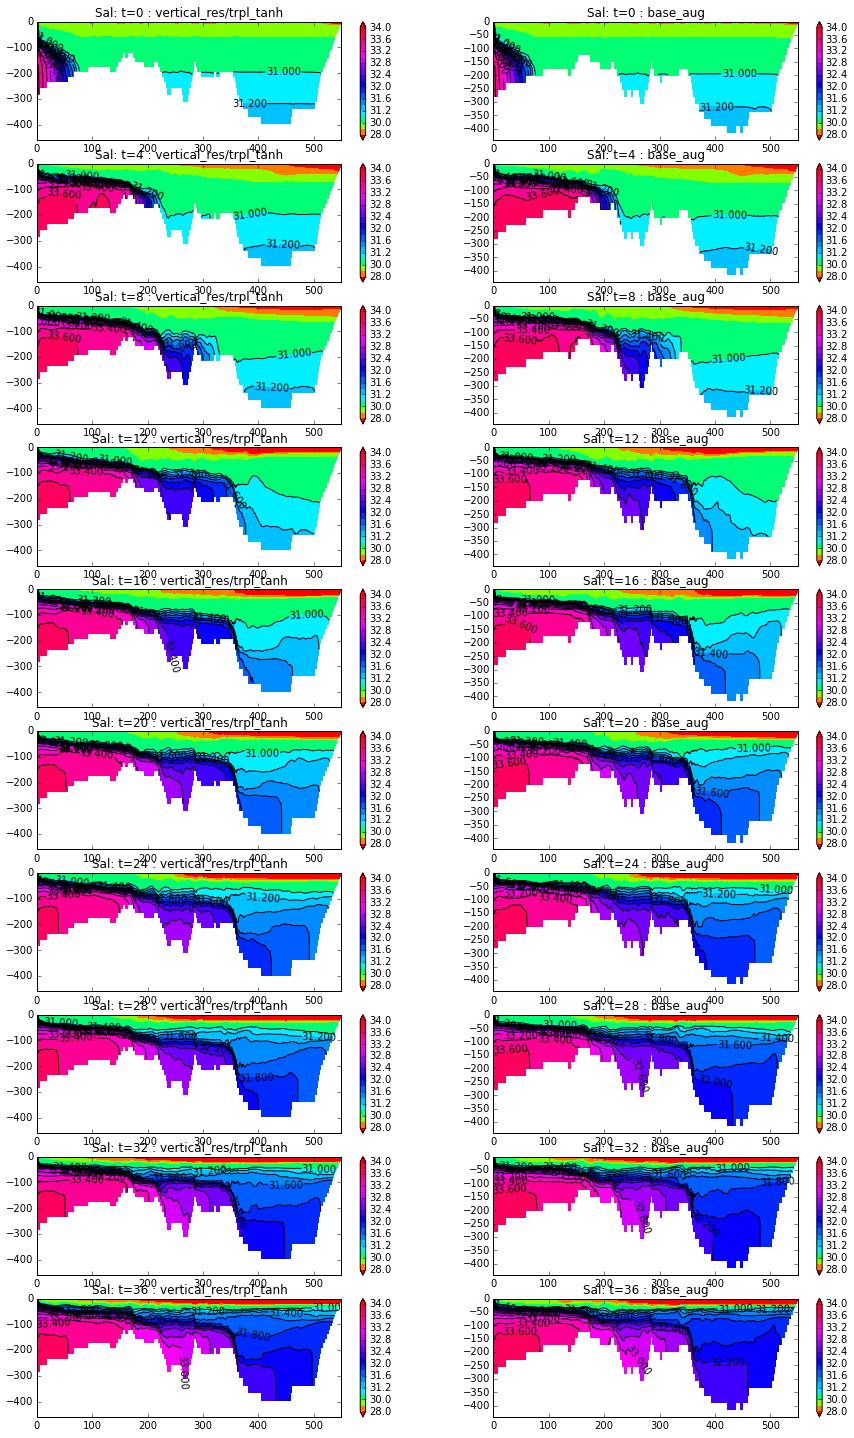

In [6]:
fig, axs = plt.subplots(10,2,figsize=(15,25))
ts = np.arange(0,40,4)
cs = [28, 29, 30, 31,31.2,31.4,31.6,31.8, 32, 32.2, 32.4, 32.6, 32.8, 33, 33.2, 33.4, 33.6, 33.8, 34 ]
for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        Splot = np.ma.masked_values(Ss[run][t,:,:],0)
        mesh=ax.contourf(xx[run],zz[run],Splot,cs,ls='None',extend='both',cmap = 'hsv')
        ax.set_title('Sal: t={} : {}'.format(t, run))
        CS = ax.contour(xx[run],zz[run],Splot, np.arange(31,34.2,.2),colors='k')
        ax.clabel(CS, inline=1, fontsize=10)
        plt.colorbar(mesh,ax=ax)

* At some times, trpl_tanh has saltier waterover the sills (t=24). At other times, the sill water is fresher (t=16). Most of the time the sill waters to have similar densities.  
* Density of the water entering the basin is usually fresher in the triple tanh.
* The basin is shallower in the trpl_tanh case. We have lower resolutio at those depths with the triple tanh. 
* What are the partial step bathymetry values?
* Salty water from SJdF (33.6 contour) penetrates further into domain in the old resolution. 

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


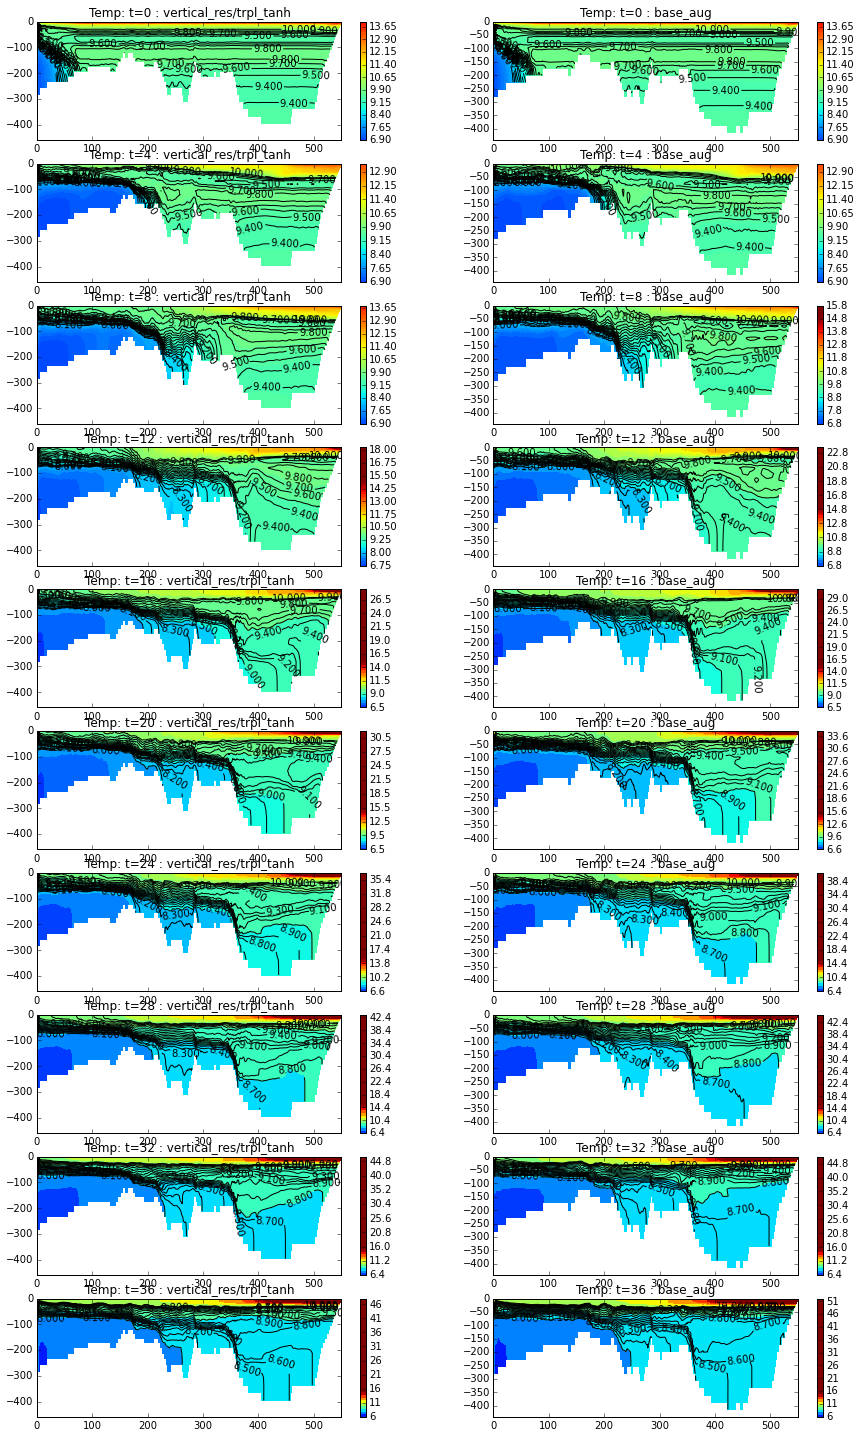

In [7]:
fig, axs = plt.subplots(10,2,figsize=(15,25))
ts = np.arange(0,40,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        Tplot = np.ma.masked_values(Ts[run][t,:,:],0)
        mesh=ax.contourf(xx[run],zz[run],Tplot,50,vmin=5,vmax=15,ls='None')
        ax.set_title('Temp: t={} : {}'.format(t, run))
        CS = ax.contour(xx[run],zz[run],Tplot, np.arange(8,10.1,.1),colors='k')
        ax.clabel(CS, inline=1, fontsize=10)
        plt.colorbar(mesh, ax=ax)

In [10]:
print(Ts[run].max())

56.302


There is something wrong with the temperature of the river water.

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


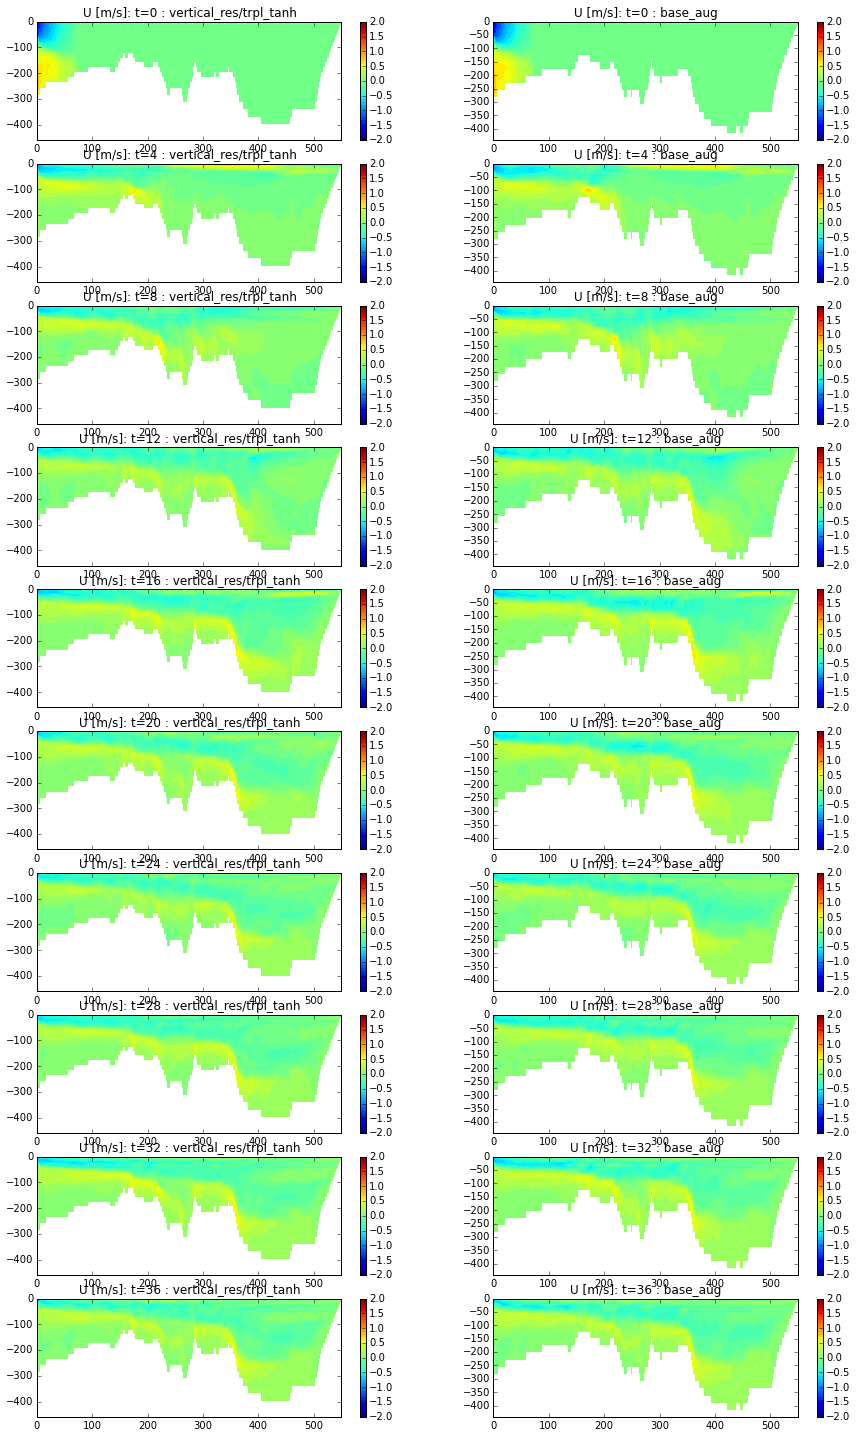

In [8]:
fig, axs = plt.subplots(10,2,figsize=(15,25))
ts = np.arange(0,40,4)
for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        Uplot = np.ma.masked_values(Us[run][t,:,:],0)
        mesh=ax.contourf(xx[run],zz[run],Uplot,np.arange(-2,2.1,.1),ls='None')
        ax.set_title('U [m/s]: t={} : {}'.format(t, run))
        plt.colorbar(mesh,ax=ax)

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


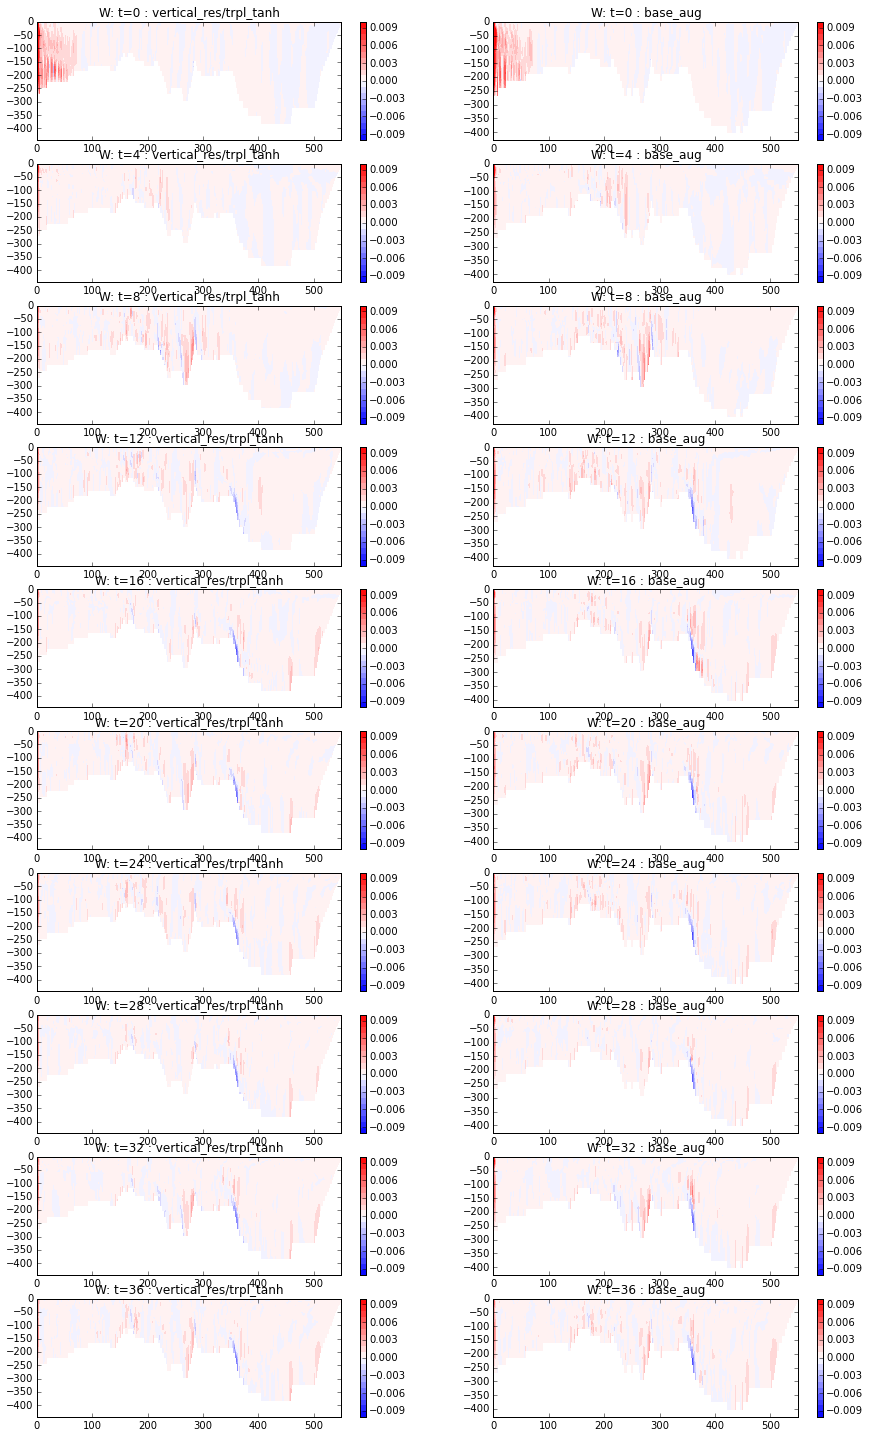

In [11]:
fig, axs = plt.subplots(10,2,figsize=(15,25))
ts = np.arange(0,40,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        Wplot = np.ma.masked_values(Ws[run][t,:,:],0)
        mesh=ax.contourf(xx[run],zzw[run],Wplot,np.arange(-.01,.011,.001),ls='None',cmap='bwr')
        ax.set_title('W: t={} : {}'.format(t, run))
        plt.colorbar(mesh,ax=ax)

Mixing parameters

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


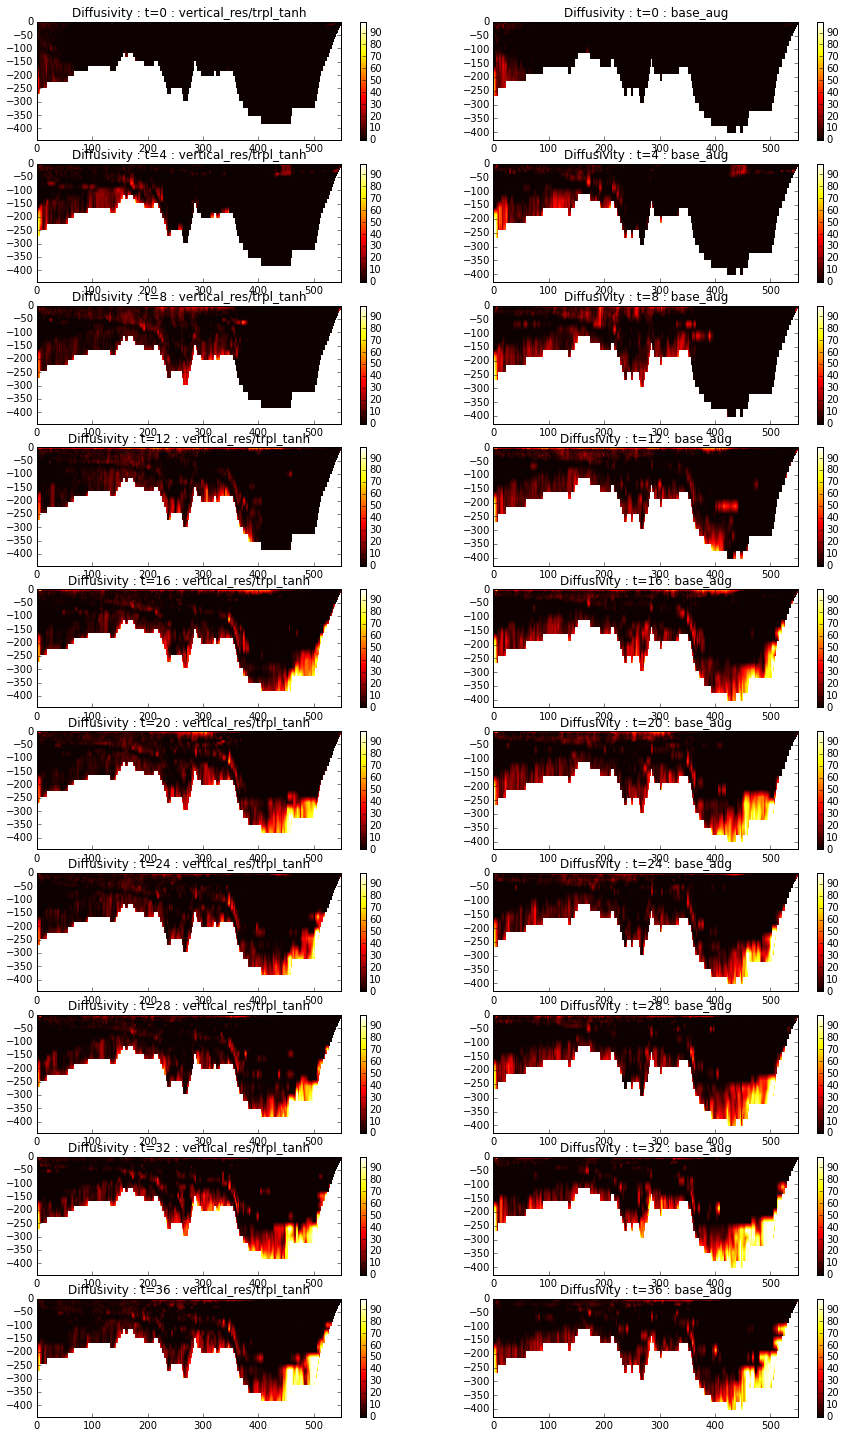

In [12]:
fig, axs = plt.subplots(10,2,figsize=(15,25))
ts = np.arange(0,40,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        Dplot = np.ma.masked_values(Diffs[run][t,:,:],0)
        mesh=ax.contourf(xx[run],zzw[run],Dplot,np.arange(0,100),cmap='hot')
        ax.set_title('Diffusivity : t={} : {}'.format(t, run))
        plt.colorbar(mesh,ax=ax)

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


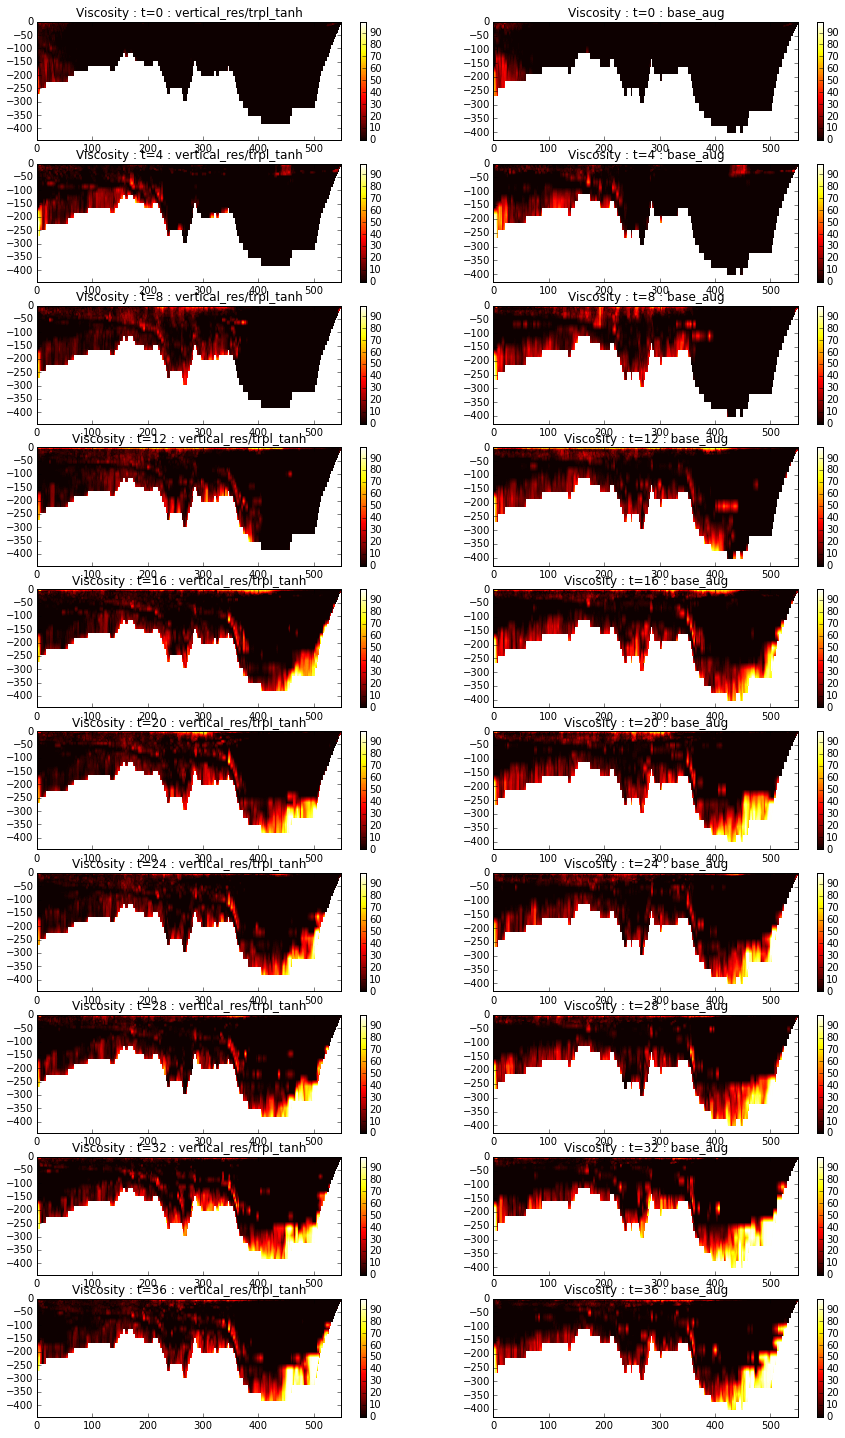

In [13]:
fig, axs = plt.subplots(10,2,figsize=(15,25))
ts = np.arange(0,40,4)

for n, run in enumerate(runs):
    for t,ax in zip(ts,axs[:,n].flat):
        Vplot = np.ma.masked_values(Viscs[run][t,:,:],0)
        mesh=ax.contourf(xx[run],zzw[run],Vplot,np.arange(0,100),cmap='hot')
        ax.set_title('Viscosity : t={} : {}'.format(t, run))
        plt.colorbar(mesh,ax=ax)

## Area averaged eddy coeffcieints over time

Area averging in the mixing region (i=300 to 700) 

In [14]:
for run in runs:
    Diffs[run] = np.ma.masked_values(Diffs[run],0)
    Viscs[run] = np.ma.masked_values(Viscs[run],0)

In [18]:
def compare_depth_averaged_mixing(ist,ien,d1,d2):
    
    fig1, axs = plt.subplots(1,2,figsize=(15,4))
    

    for run in runs:
        #index of depths
        ind1 = tidetools.find_model_level(d1,depthsw[run])
        ind2 = tidetools.find_model_level(d2,depthsw[run])
        print(run, depthsw[run][ind1], depthsw[run][ind2])
        Diff_davg = analyze.depth_average(Diffs[run][:,ind1:ind2,ist:ien],depthsw[run][ind1:ind2],depth_axis=1)
        print('Max diff:', run, Diff_davg.max())
        axs[0].plot(np.nanmean(Diff_davg,axis=1),label=run)
        axs[0].legend()
        axs[0].set_xlabel('time')
        axs[0].set_ylabel('Diffusivity m^2/s')
    
        Visc_davg = analyze.depth_average(Viscs[run][:,ind1:ind2,ist:ien],depthsw[run][ind1:ind2],depth_axis=1)
        print('Max visc:', run, Visc_davg.max())
        axs[1].plot(np.nanmean(Visc_davg,axis=1),label=run)
        axs[1].legend()
        axs[1].set_xlabel('time')
        axs[1].set_ylabel('Viscosity m^2/s')
    
    fig2, axs = plt.subplots(1,2,figsize=(15,4))
    for run,ax in zip(runs,axs):
        #index of depths
        ind1 = tidetools.find_model_level(d1,depthsw[run])
        ind2 = tidetools.find_model_level(d2,depthsw[run])
        Dplot =Diffs[run][t,:,:]
        mesh=ax.pcolormesh(np.arange(Diffs[run].shape[-1]),depthsw[run],Dplot,vmin=0,vmax=100,cmap='hot')
        ax.set_title('Diffusivity : t={} : {}'.format(t, run))
        cbar = plt.colorbar(mesh,ax=ax)
        cbar.set_label('m^2/s')
        ax.set_ylim([450,0])
        ax.plot([ien,ien],[depthsw[run][ind1],depthsw[run][ind2]], '-b')
        ax.plot([ist,ist],[depthsw[run][ind1],depthsw[run][ind2]], '-b')
        ax.plot([ist,ien],[depthsw[run][ind1],depthsw[run][ind1]], '-b')
        ax.plot([ist,ien],[depthsw[run][ind2],depthsw[run][ind2]], '-b')
        
    return fig1, fig2

vertical_res/trpl_tanh 1.00425 443.305
Max diff: vertical_res/trpl_tanh 25.8065783933
Max visc: vertical_res/trpl_tanh 26.7879316861
base_aug 1.0 428.0
Max diff: base_aug 24.8687648929
Max visc: base_aug 26.2450252908


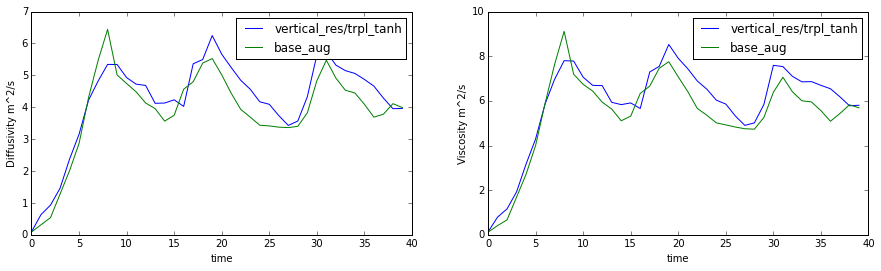

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


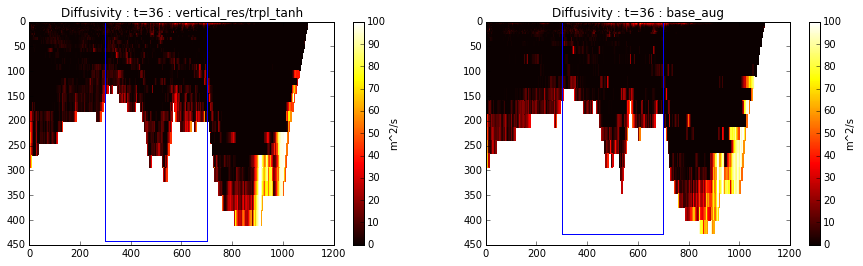

In [19]:

ist=300
ien=700
d1=1
d2=450

fig1, fig2 = compare_depth_averaged_mixing(ist,ien,d1,d2)

* Higher eddy values in triple tanh case

###Surface

vertical_res/trpl_tanh 1.00425 10.1062
Max diff: vertical_res/trpl_tanh 60.5350360875
Max visc: vertical_res/trpl_tanh 74.3167349979
base_aug 1.0 10.0034
Max diff: base_aug 56.2261746698
Max visc: base_aug 66.696637093


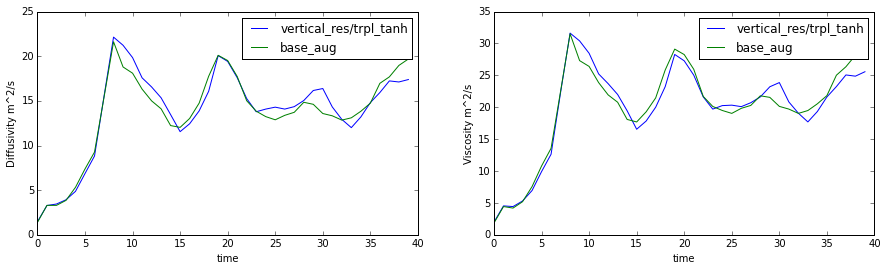

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


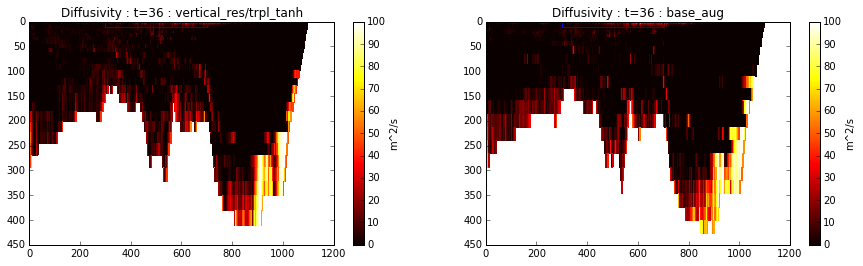

In [20]:
ist=300
ien=700
d1=1
d2=10

fig1, fig2 = compare_depth_averaged_mixing(ist,ien,d1,d2)

###Intermediate

vertical_res/trpl_tanh 53.4143 99.3358
Max diff: vertical_res/trpl_tanh 31.1812972257
Max visc: vertical_res/trpl_tanh 37.2653558322
base_aug 50.9632 109.737
Max diff: base_aug 29.3766917386
Max visc: base_aug 36.2358540893


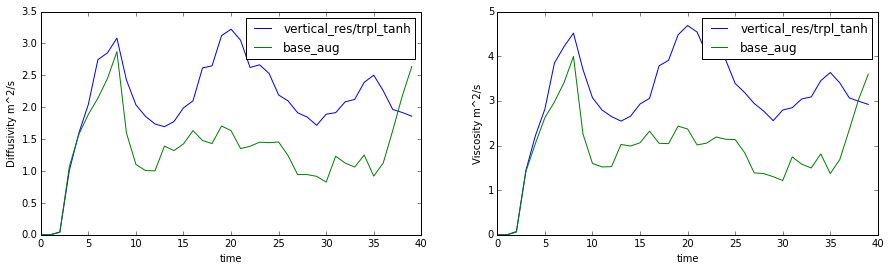

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


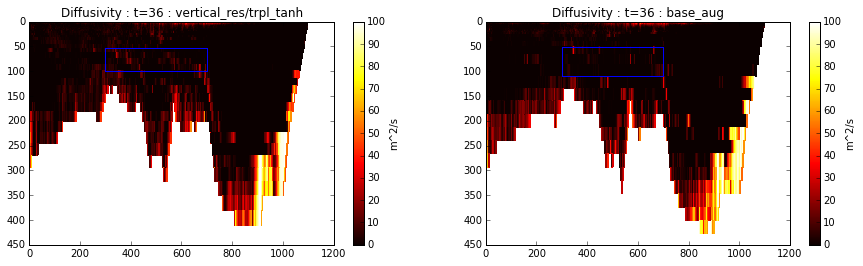

In [21]:
ist=300
ien=700
d1=50
d2=100

fig1, fig2 = compare_depth_averaged_mixing(ist,ien,d1,d2)

Averaging box is completly different!

###Deep

vertical_res/trpl_tanh 99.3358 411.885
Max diff: vertical_res/trpl_tanh 47.286009637
Max visc: vertical_res/trpl_tanh 48.1571093407
base_aug 109.737 401.068
Max diff: base_aug 53.986723129
Max visc: base_aug 55.8388042825


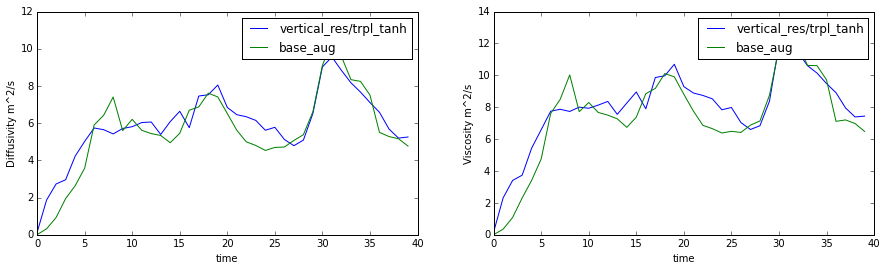

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


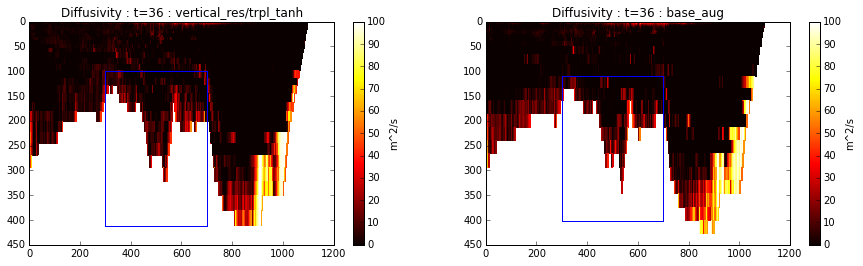

In [22]:
ist=300
ien=700
d1=100
d2=400
fig1, fig2 = compare_depth_averaged_mixing(ist,ien,d1,d2)

* The averaging area is slight different again...

###Strait of Juan de Fuca

vertical_res/trpl_tanh 1.00425 411.885
Max diff: vertical_res/trpl_tanh 30.2786823753
Max visc: vertical_res/trpl_tanh 31.9332652071
base_aug 1.0 401.068
Max diff: base_aug 33.1162661734
Max visc: base_aug 35.0890352755


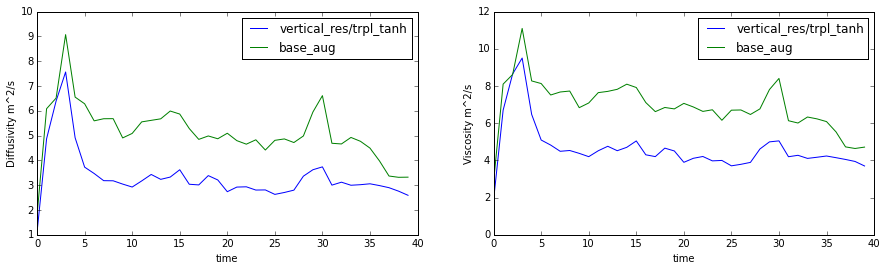

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


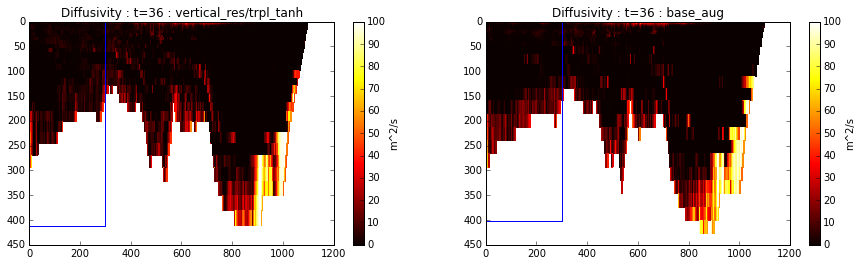

In [23]:
ist=0
ien=300
d1=1
d2=400
fig1, fig2 = compare_depth_averaged_mixing(ist,ien,d1,d2)

Smaller eddy coefficients in the Strait of Juan de Fuca. Dissipation in the boundary later seems to behave differently.

### Strait of Georgia

vertical_res/trpl_tanh 1.00425 443.305
Max diff: vertical_res/trpl_tanh 33.5011861375
Max visc: vertical_res/trpl_tanh 33.7920693643
base_aug 1.0 428.0
Max diff: base_aug 34.8118645405
Max visc: base_aug 35.30155578


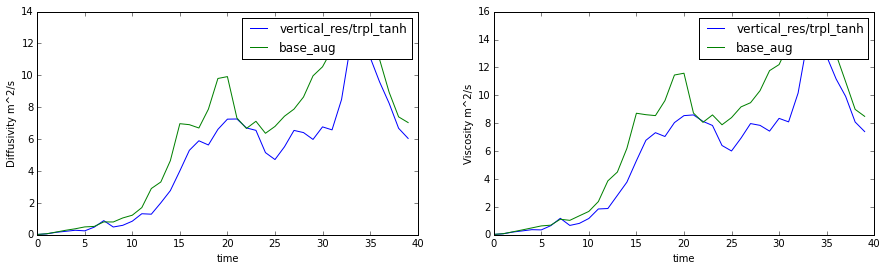

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


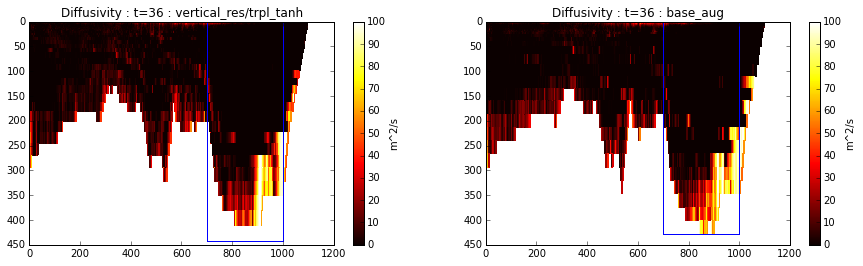

In [24]:
ist=700
ien=1000
d1=1
d2=450
fig1, fig2 = compare_depth_averaged_mixing(ist,ien,d1,d2)

### Whole domain

vertical_res/trpl_tanh 1.00425 443.305
Max diff: vertical_res/trpl_tanh 33.5011861375
Max visc: vertical_res/trpl_tanh 33.7920693643
base_aug 1.0 428.0
Max diff: base_aug 34.8118645405
Max visc: base_aug 35.30155578


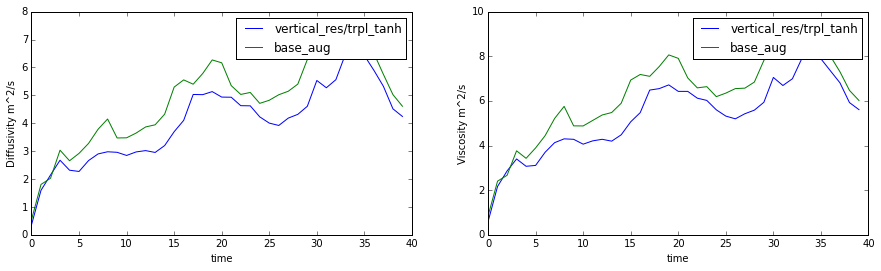

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


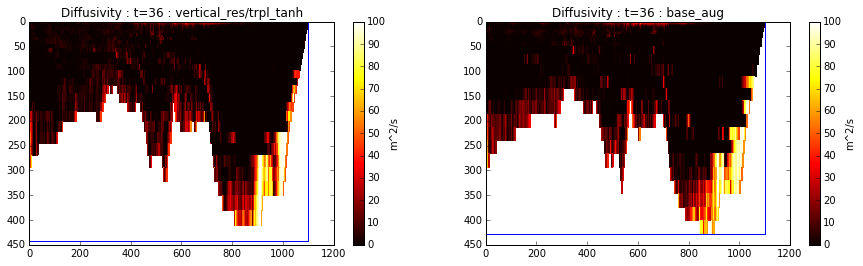

In [25]:
ist=0
ien=1100
d1=1
d2=450
fig1, fig2 = compare_depth_averaged_mixing(ist,ien,d1,d2)

Overall, smaller mixing coefficients in the triple tanh case. BUT, in the mixing reigon, they are higher....

# Stratification Profiles

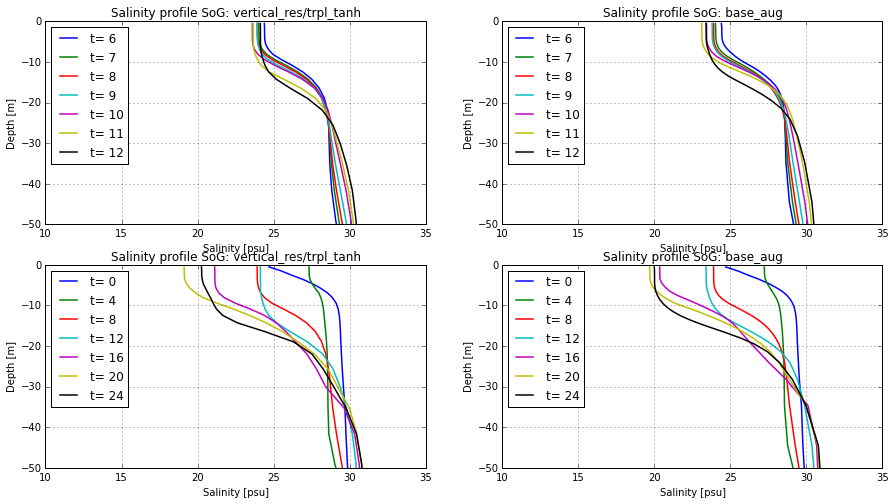

In [26]:
i = 900;

fig, axs = plt.subplots(2,2,figsize=(15,8))
ts = np.arange(6,13,1)

for run, ax in zip(runs, axs[0,:].flat):
    for t in zip(ts):
        ax.plot(Ss[run][t,:,i].T,zz[run][:,i],label='t= {}'.format(t[0]),lw=1.5)
        ax.set_title('Salinity profile SoG: {}'.format(run))
        
ts = np.arange(0,27,4)

for run, ax in zip(runs, axs[1,:].flat):
    for t in zip(ts):
        ax.plot(Ss[run][t,:,i].T,zz[run][:,i],label='t= {}'.format(t[0]),lw=1.5)
        ax.set_title('Salinity profile SoG: {}'.format(run))

    
for ax in axs.flat:
    ax.legend(loc=0)
    ax.grid()
    ax.set_xlim([10,35])
    ax.set_ylim([-50,0])
    ax.set_xlabel('Salinity [psu]')
    ax.set_ylabel('Depth [m]')
        
#for t, ax in zip(ts, axs[:,2].flat):
#    ax.pcolormesh(xx,zz,Ss[run1][t,:,:]-Ss[run2][t,:,:],vmin=-1,vm

There are some differences in the surface layer. 

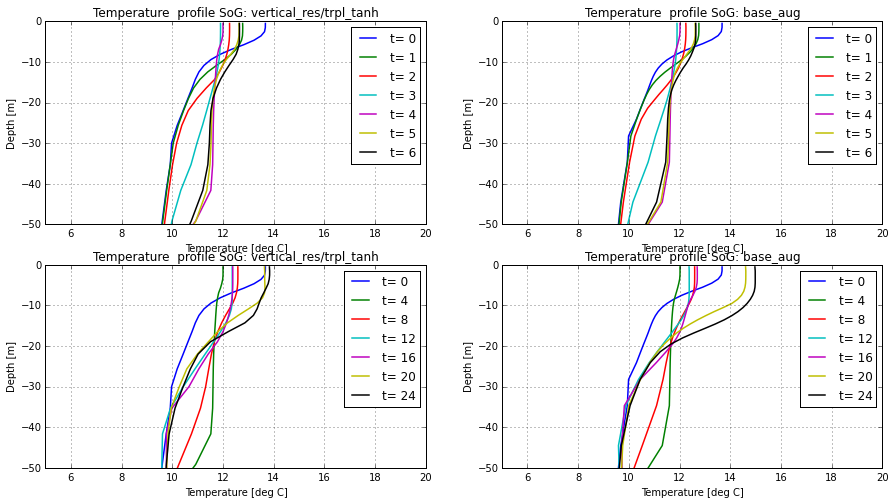

In [27]:
i = 900;

fig, axs = plt.subplots(2,2,figsize=(15,8))
ts = np.arange(0,7,1)

for run, ax in zip(runs, axs[0,:].flat):
    for t in zip(ts):
        ax.plot(Ts[run][t,:,i].T,zz[run][:,i],label='t= {}'.format(t[0]),lw=1.5)
        ax.set_title('Temperature  profile SoG: {}'.format(run))

ts = np.arange(0,27,4)

for run, ax in zip(runs, axs[1,:].flat):
    for t in zip(ts):
        ax.plot(Ts[run][t,:,i].T,zz[run][:,i],label='t= {}'.format(t[0]),lw=1.5) 
        ax.set_title('Temperature  profile SoG: {}'.format(run))
    
for ax in axs.flat:    
    ax.legend(loc=0)
    ax.grid()
    ax.set_xlim([5,20])
    ax.set_ylim([-50,0])
    ax.set_xlabel('Temperature [deg C]')
    ax.set_ylabel('Depth [m]')

Averaging across SoG basin: 400km to 500km

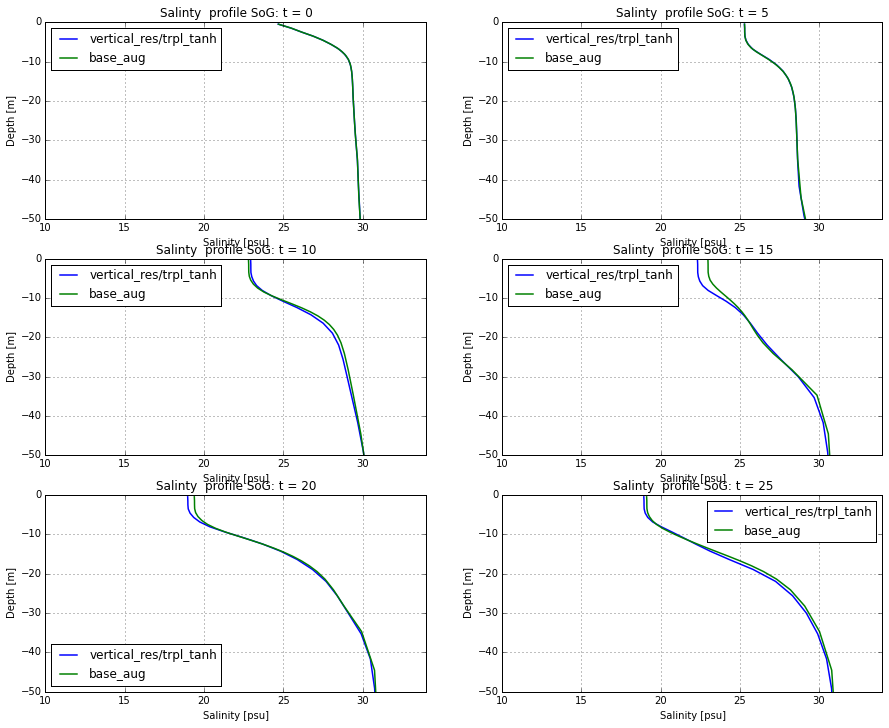

In [28]:
i = 800; e=1000;

fig, axs = plt.subplots(3,2,figsize=(15,12))
ts = np.arange(0,27,5)
for run in runs:
    Ss[run] = np.ma.masked_values(Ss[run],0)

for t, ax in zip(ts, axs.flat):
    for run in runs:
        ax.plot(np.nanmean(Ss[run][t,:,i:e],axis=1).T,zz[run][:,i],label=run,lw=1.5)
        ax.set_title('Salinty  profile SoG: t = {}'.format(t))
    
for ax in axs.flat:    
    ax.legend(loc=0)
    ax.grid()
    ax.set_xlim([10,34])
    ax.set_ylim([-50,0])
    ax.set_xlabel('Salinity [psu]')
    ax.set_ylabel('Depth [m]')